In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array

In [2]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [3]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [4]:
train_datagen = image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2)

In [5]:
train_generator = train_datagen.flow_from_directory(
        'data',
        target_size=(150,150),
        batch_size=16 ,
        class_mode='binary',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        'data',
        target_size=(150,150),
        batch_size=16 ,
        class_mode='binary',
        subset='validation')

Found 1101 images belonging to 2 classes.
Found 275 images belonging to 2 classes.


In [6]:
model_saved = model.fit(train_generator,
                   steps_per_epoch=train_generator.samples // 16,
                   validation_data=validation_generator,
                   validation_steps=validation_generator.samples // 16,
                   epochs=10)

Epoch 1/10
68/68 [==============================] - 20s 271ms/step - loss: 0.4677 - accuracy: 0.7429 - val_loss: 0.3721 - val_accuracy: 0.8382
Epoch 2/10
68/68 [==============================] - 12s 170ms/step - loss: 0.1522 - accuracy: 0.9539 - val_loss: 0.1159 - val_accuracy: 0.9596
Epoch 3/10
68/68 [==============================] - 12s 170ms/step - loss: 0.1048 - accuracy: 0.9677 - val_loss: 0.0992 - val_accuracy: 0.9706
Epoch 4/10
68/68 [==============================] - 11s 167ms/step - loss: 0.0691 - accuracy: 0.9788 - val_loss: 0.1446 - val_accuracy: 0.9596
Epoch 5/10
68/68 [==============================] - 12s 169ms/step - loss: 0.0653 - accuracy: 0.9733 - val_loss: 0.0894 - val_accuracy: 0.9743
Epoch 6/10
68/68 [==============================] - 12s 169ms/step - loss: 0.0491 - accuracy: 0.9853 - val_loss: 0.0567 - val_accuracy: 0.9816
Epoch 7/10
68/68 [==============================] - 12s 170ms/step - loss: 0.0591 - accuracy: 0.9751 - val_loss: 0.0862 - val_accuracy: 0.9743

In [7]:
model.save('facemask_detector_model.h5', model_saved)

In [8]:
with_mask_test_img = load_img(r'data/with_mask/7-with-mask.jpg', target_size=(150,150,3))
without_mask_test_img = load_img(r'data/without_mask/augmented_image_176.jpg', target_size=(150,150,3))

In [9]:
with_mask_test_img_array = img_to_array(with_mask_test_img)
without_mask_test_img_array = img_to_array(without_mask_test_img)

with_mask_test_img_array = np.expand_dims(with_mask_test_img, axis=0)
without_mask_test_img_array = np.expand_dims(without_mask_test_img, axis=0)

In [10]:
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 126ms/step


Text(0.5, 1.0, 'Mask')

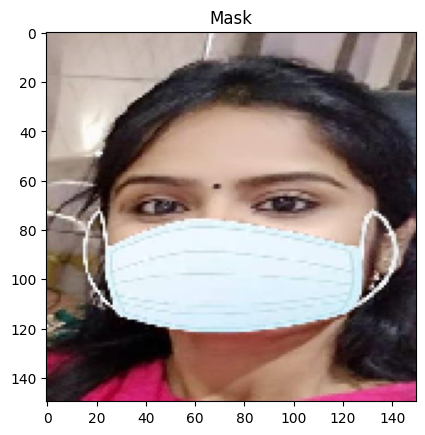

In [11]:
plt.imshow(with_mask_test_img)
plt.title('Mask') if not model.predict(with_mask_test_img_array)[0][0] else plt.title('No mask')

1/1 [==============================] - 0s 26ms/step


Text(0.5, 1.0, 'No mask')

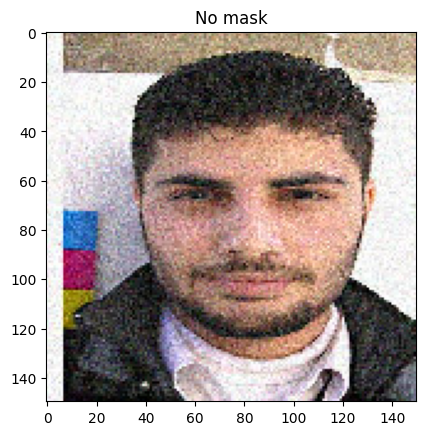

In [12]:
plt.imshow(without_mask_test_img)
plt.title('Mask') if not model.predict(without_mask_test_img_array)[0][0] else plt.title('No mask')